In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
file_path = r"C:\Users\18014\Desktop\Masters\D600 - Statistical Data Mining\Task 1\D600 Task 1 Dataset 1 Housing Information.csv"

df = pd.read_csv(file_path)

In [16]:
df

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.8992,566.62,1.000000,4,779.42,20.56,5.62,39.46,10.08,...,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54230,0
1,5009,155586.0947,1472.34,1.000000,2,656.13,15.62,5.63,40.51,7.89,...,4.08,5.56,6.83,No,Green,No,1,17,50042.59757,0
2,4450,131050.8324,550.00,1.779354,3,754.57,12.47,9.20,48.38,23.74,...,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34440,0
3,1070,151361.7125,941.81,2.035254,2,439.59,22.22,7.08,94.67,5.22,...,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12145,0
4,400,113167.6128,550.00,1.064644,3,353.03,8.28,5.93,16.80,43.13,...,3.36,5.46,6.99,No,White,Yes,1,21,22934.59654,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6987,307821.1758,550.00,2.111022,4,892.35,11.89,7.97,28.18,19.23,...,4.76,3.81,6.87,No,White,Yes,1,18,241131.63070,1
6996,6995,421368.8869,1726.12,4.056115,2,943.19,34.06,5.82,90.45,17.60,...,5.31,9.84,10.00,No,White,Yes,1,18,481604.80730,1
6997,6996,473382.5348,1026.36,2.077177,5,149.31,0.10,8.81,31.79,11.59,...,4.98,7.47,2.96,No,Green,No,1,13,380555.49390,1
6998,6998,343397.9756,2218.22,1.000000,4,526.81,11.18,9.20,15.21,3.96,...,4.68,7.66,6.12,No,Blue,Yes,1,10,442610.31710,0


In [18]:
#C2 Requirement
#Descriptive statistics for independent variables and the dependent variable
variable_columns = ['Price', 'SquareFootage', 'CrimeRate']
stats = df[variable_columns].describe()

# Display the results
print(stats)

              Price  SquareFootage    CrimeRate
count  7.000000e+03    7000.000000  7000.000000
mean   3.072820e+05    1048.947459    31.226194
std    1.501734e+05     426.010482    18.025327
min    8.500000e+04     550.000000     0.030000
25%    1.921075e+05     660.815000    17.390000
50%    2.793230e+05     996.320000    30.385000
75%    3.918781e+05    1342.292500    43.670000
max    1.046676e+06    2874.700000    99.730000


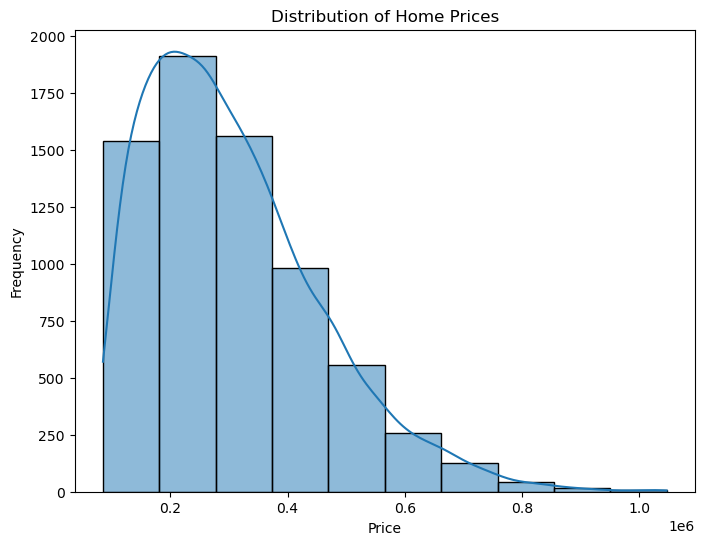

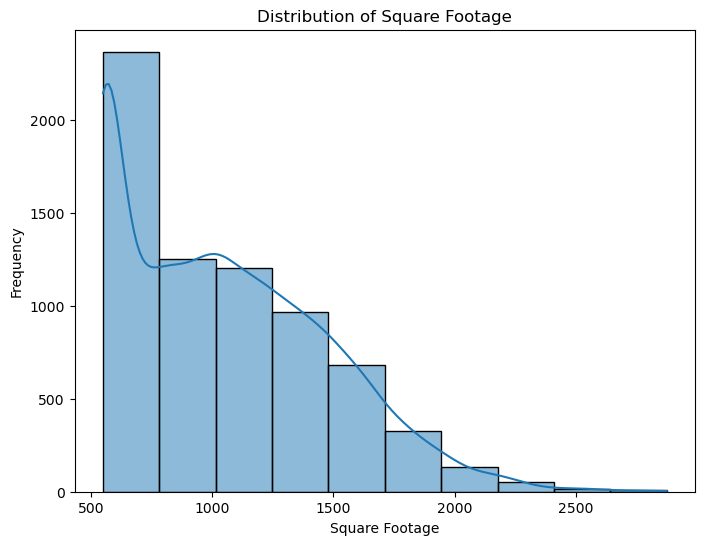

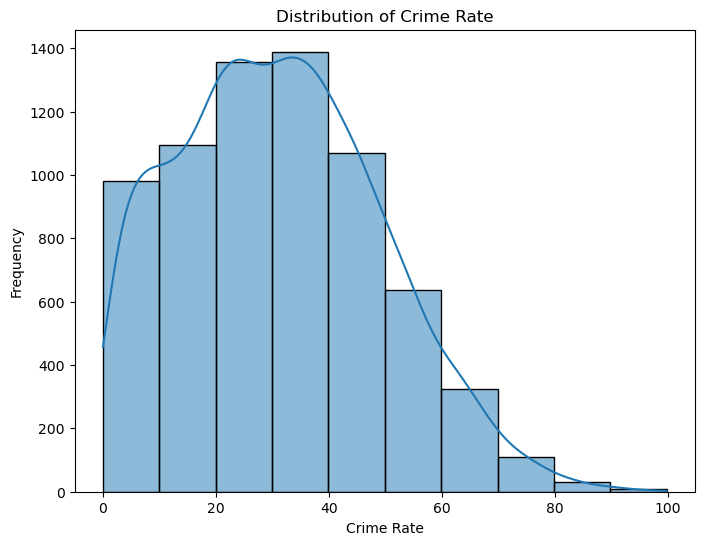

In [20]:
#C3 Requirement
#Univariate visualizations
#Histogram of Price distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True, bins=10)
plt.title('Distribution of Home Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#Histogram of square Footage distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['SquareFootage'], kde=True, bins=10)
plt.title('Distribution of Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.show()

#Histogram of crime Rate distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['CrimeRate'], kde=True, bins=10)
plt.title('Distribution of Crime Rate')
plt.xlabel('Crime Rate')
plt.ylabel('Frequency')
plt.show()


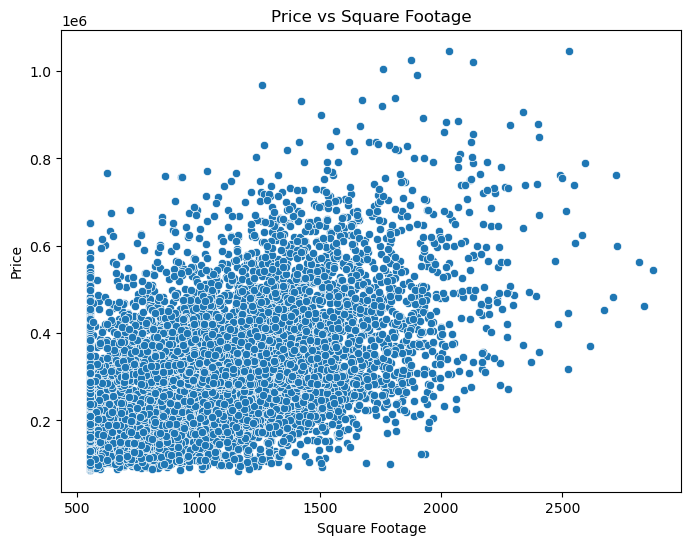

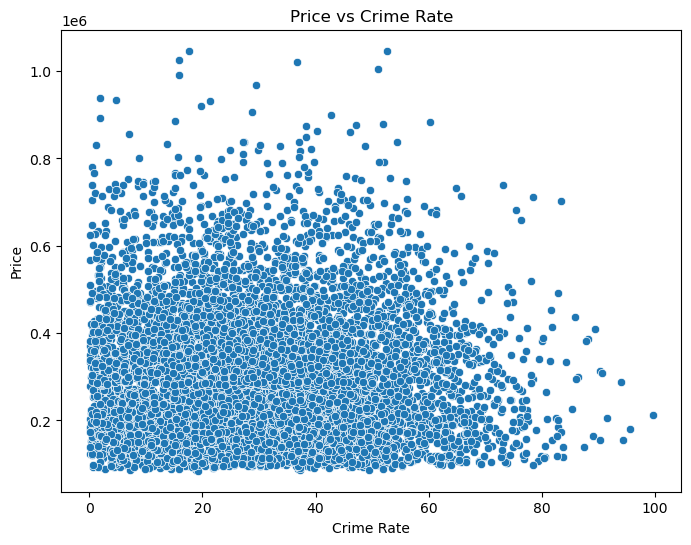

In [21]:
#Bivariate visualizations

#Scatterplot showing Price vs Square Footage
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SquareFootage', y='Price', data=df)
plt.title('Price vs Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

#Scatterplot showing Price vs Crime Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CrimeRate', y='Price', data=df)
plt.title('Price vs Crime Rate')
plt.xlabel('Crime Rate')
plt.ylabel('Price')
plt.show()

In [23]:
#D1 Requirement
#Test, train, split using 80/20 test size split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=1)

# Show the shapes of the datasets
print("Training dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

Training dataset shape: (5600, 22)
Test dataset shape: (1400, 22)


In [24]:
#D2 Requirement
#Defining the dependent and independent variables
X_train = train_df[['SquareFootage', 'CrimeRate']]
y_train = train_df['Price']

#Add a constant
X_train = sm.add_constant(X_train)

#Fit the regression model
model = sm.OLS(y_train, X_train).fit()

In [28]:
#Optimization
#Chosen method: Backward Elimination
def backward_elimination(X, y, significance_level=0.05):
    X = sm.add_constant(X)
    while True:
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()
        if max_p_value >= significance_level:
            X = X.drop(p_values.idxmax(), axis=1)
        else:
            break
    return model

#Define our optiman model as the new data after backward elimination
optimized_model = backward_elimination(X_train, y_train)

optimized_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     1233.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:52:16   Log-Likelihood:                -73721.
No. Observations:                5600   AIC:                         1.474e+05
Df Residuals:                    5597   BIC:                         1.475e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.115e+05   5470.947     20.385      0.000    1.01e+05    1.22e+05
SquareFootage   195.7358      3.964     49.374      0.000     187.964     203.507
CrimeRate      -296.4352     93.237     -3.179      0.001    -479.216    -113.654
==============================================================================
Omnibus:                      548.558   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              757.418
Skew:                           0.788   Prob(JB):                    3.38e-165
Kurtosis:                       3.874   Cond. No.                     3.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
#D3 Requirement
#Mean Squared Error on the training set
y_train_pred = optimized_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)

#Show result
mse_train

15925859361.683376

In [32]:
#D4 Requirement
# "Run the prediction on the test dataset using the optimized regression model from part D2 to give the accuracy of the prediction model 
# based on the mean squared error"
X_test = test_df[['SquareFootage', 'CrimeRate']]
y_test = test_df['Price']

#Add constant to test set
X_test = sm.add_constant(X_test)

#Run prediction on optimized model
y_test_pred = optimized_model.predict(X_test)

y_test_pred

2305    216311.585063
4388    417573.267632
1686    235250.906426
4945    304947.805754
4197    364773.585495
            ...      
2090    366236.166544
997     239730.675196
4672    243954.776073
3152    235383.196054
5823    293895.932714
Length: 1400, dtype: float64

In [34]:
#Comparing actual vs predicted prices
predictions_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_test_pred})

# Display new dataframe
predictions_df

,Actual Price,Predicted Price
2305,184107.5474,216311.585063
4388,376148.7559,417573.267632
1686,188820.5790,235250.906426
4945,298752.8523,304947.805754
4197,464444.5259,364773.585495
...,...,...
2090,200241.5569,366236.166544
997,231996.9865,239730.675196
4672,402906.3189,243954.776073
3152,228139.8188,235383.196054


In [36]:
#Mean Squared Error for predictions dataframe
mse = mean_squared_error(predictions_df['Actual Price'], predictions_df['Predicted Price'])

mse

15171689294.630033

In [44]:
#Calculating Variance Inflation Factor (VIF) for the predictor variables
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

         Feature        VIF
0          const  10.519074
1  SquareFootage   1.001908
2      CrimeRate   1.001908
